# NOTAM Analysis

Please note that the data for this analysis is saved locally in a `data` folder that is one level above (a parent folder) to where the [GitHub](https://github.com/DAEN-Team-1/Final "GitHub") files have been saved. This was done because a lot of the data files are too large to be included in the GitHub repoo.

In [1]:
# imports
import pandas as pd
# import bamboolib as bam

In [141]:
# read data
#            not                     parsed               not           not
date_cols = ['POSSIBLE_START_DATE', 'POSSIBLE_END_DATE', 'ISSUE_DATE', 'CANCELED_DATE']
df = pd.read_csv('../data/notams.csv', on_bad_lines='skip', encoding='utf-16', parse_dates=date_cols)

/var/folders/wk/_x7mg1g17x70jm9czv01yk_r0000gp/T/ipykernel_86593/115128146.py:4: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/notams.csv', on_bad_lines='skip', encoding='utf-16', parse_dates=date_cols)


Look at first few rows of data

In [3]:
df.head()

,NOTAM_REC_ID,FNS_ID,FILENAME,NOTAM_ID,NOTAM_TYPE,RELATED_NOTAM_ID,SIMPLE_TEXT,LOC_ID_ACCOUNTABLE_ORG,NOTAM_NUMBER,RELATED_NOTAM_NUMBER,...,POSSIBLE_END_DATE,ISSUE_DATE,CANCELED_DATE,AFFECTED_FIR,DESIGNATOR,DESIGNATOR_NAME,LOCATION_NAME,ACCOUNT_ID,LOCATION_CODE,LAUNCHES_REC_ID
0,1,FNS_ID_43130705,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0604/16,NaN,NaN,!SUAC 05/604 ZAU AIRSPACE VOLK SOUTH MOA ACT 5...,SUAC,05/604,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZAU ARTCC,SUAC,ZAU,NaN
1,2,FNS_ID_43130704,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0603/16,NaN,NaN,!SUAC 05/603 ZAU AIRSPACE VOLK EAST MOA ACT 80...,SUAC,05/603,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZAU ARTCC,SUAC,ZAU,NaN
2,3,FNS_ID_43130706,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0605/16,NaN,NaN,!SUAC 05/605 ZMP AIRSPACE FALLS 1 MOA ACT 500F...,SUAC,05/605,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZMP ARTCC,SUAC,ZMP,NaN
3,4,FNS_ID_43130708,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0607/16,NaN,NaN,!SUAC 05/607 ZMP AIRSPACE FALLS 2 MOA ACT 500F...,SUAC,05/607,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZMP ARTCC,SUAC,ZMP,NaN
4,5,FNS_ID_43130703,E:\Working\Sherlock_NOTAM_Data\Temporary\notam...,0602/16,NaN,NaN,!SUAC 05/602 ZMP AIRSPACE VOLK WEST MOA ACT 10...,SUAC,05/602,NaN,...,2016-05-24 19:45:00,2016-05-24 04:35:00,2016-05-24 12:10:00,NaN,NaN,NaN,ZMP ARTCC,SUAC,ZMP,NaN


Get information on the dataframe
* 1,062,863 rows
* 37 columns
* With the exception of `NOTAM_REC_ID` and `LAUNCHES_REC_ID`, all fields appear to be strings. 
    * This may require updating in order to 
* Aside from `LAUNCHES_REC_ID`, most columns have only a few hundred non-null entries, suggesting that the data is very sparse

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062038 entries, 0 to 1062037
Data columns (total 37 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   NOTAM_REC_ID            1062038 non-null  int64         
 1   FNS_ID                  1062038 non-null  object        
 2   FILENAME                1062038 non-null  object        
 3   NOTAM_ID                1062023 non-null  object        
 4   NOTAM_TYPE              923865 non-null   object        
 5   RELATED_NOTAM_ID        242320 non-null   object        
 6   SIMPLE_TEXT             544152 non-null   object        
 7   LOC_ID_ACCOUNTABLE_ORG  518500 non-null   object        
 8   NOTAM_NUMBER            516560 non-null   object        
 9   RELATED_NOTAM_NUMBER    92813 non-null    object        
 10  TEXT                    1055996 non-null  object        
 11  Q_CODE                  645876 non-null   object        
 12  Q_CODE_INTERPR

Get summary stats

In [5]:
df.describe()

,NOTAM_REC_ID,LAUNCHES_REC_ID
count,1.062038e+06,0.0
mean,5.314754e+05,NaN
std,3.068384e+05,NaN
min,1.000000e+00,NaN
25%,2.657342e+05,NaN
50%,5.315025e+05,NaN
75%,7.972258e+05,NaN
max,1.062868e+06,NaN


## Examine column by column

#### NOTAM_REC_ID
* Seems to be a zero-indexed, sequence of indexes.

In [6]:
df['NOTAM_REC_ID']

0                1
1                2
2                3
3                4
4                5
            ...   
1062033    1062864
1062034    1062865
1062035    1062866
1062036    1062867
1062037    1062868
Name: NOTAM_REC_ID, Length: 1062038, dtype: int64

In [63]:
df['NOTAM_REC_ID'].value_counts() > 1

1          False
708713     False
708683     False
708684     False
708685     False
           ...  
354307     False
354308     False
354309     False
354310     False
1062868    False
Name: NOTAM_REC_ID, Length: 1062038, dtype: bool

#### FNS_ID
* All unique

In [7]:
df['FNS_ID']

0          FNS_ID_43130705
1          FNS_ID_43130704
2          FNS_ID_43130706
3          FNS_ID_43130708
4          FNS_ID_43130703
                ...       
1062033    FNS_ID_57055569
1062034    FNS_ID_57055570
1062035    FNS_ID_57055571
1062036    FNS_ID_57055572
1062037    FNS_ID_57055573
Name: FNS_ID, Length: 1062038, dtype: object

In [64]:
# All are unique
df['FNS_ID'].value_counts() > 1

FNS_ID_43130705    False
FNS_ID_51108106    False
FNS_ID_51108060    False
FNS_ID_51108082    False
FNS_ID_51108064    False
                   ...  
FNS_ID_47241553    False
FNS_ID_47241572    False
FNS_ID_47241577    False
FNS_ID_47241555    False
FNS_ID_57055573    False
Name: FNS_ID, Length: 1062038, dtype: bool

#### FILENAME
* Do we have access to these files?
* Repeats, but cover an tiny proportion of the data. 

In [8]:
df['FILENAME']

0          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
2          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
3          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
4          E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
                                 ...                        
1062033    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1062034    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1062035    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1062036    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
1062037    E:\Working\Sherlock_NOTAM_Data\Temporary\notam...
Name: FILENAME, Length: 1062038, dtype: object

In [65]:
df['FILENAME'].value_counts(dropna=False)

E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20191001T1507Z_tmp.xml      10492
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20190503T1519Z_tmp.xml       4901
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20170622T202144Z_tmp.xml     1637
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160831T173246Z_tmp.xml     1453
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160831T171728Z_tmp.xml     1451
                                                                           ...  
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180604T010732Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180405T051356Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20171029T214122Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180604T010030Z_tmp.xml        1
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180113T110000Z_tmp.xml        1
Name: FILENAME, Length: 67086, dtype: int64

In [66]:
df['FILENAME'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20191001T1507Z_tmp.xml      0.00988
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20190503T1519Z_tmp.xml      0.00461
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20170622T202144Z_tmp.xml    0.00154
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160831T173246Z_tmp.xml    0.00137
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20160831T171728Z_tmp.xml    0.00137
                                                                            ...   
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180604T010732Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180405T051356Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20171029T214122Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180604T010030Z_tmp.xml    0.00000
E:\Working\Sherlock_NOTAM_Data\Temporary\notam.20180113T110000Z_tmp.xml    0.00000
Name: FILENAME, Length: 67086, dtype: object

#### NOTAM_ID
* Repeats, but cover an tiny proportion of the data.

In [ ]:
df['NOTAM_ID']

0           0604/16
1           0603/16
2           0605/16
3           0607/16
4           0602/16
             ...   
1062033     0635/20
1062034     0385/20
1062035     0018/20
1062036     0137/20
1062037    A1093/20
Name: NOTAM_ID, Length: 1062038, dtype: object

In [67]:
df['NOTAM_ID'].value_counts(dropna=False)

0001/17        3076
0002/17        2559
0003/17        2309
0004/17        2036
0001/18        2024
               ... 
Y2905/17          1
B5888/17          1
SWES0500/17       1
SWEV0318/17       1
B0833/20          1
Name: NOTAM_ID, Length: 307733, dtype: int64

In [68]:
df['NOTAM_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0001/17        0.00290
0002/17        0.00241
0003/17        0.00217
0004/17        0.00192
0001/18        0.00191
                ...   
Y2905/17       0.00000
B5888/17       0.00000
SWES0500/17    0.00000
SWEV0318/17    0.00000
B0833/20       0.00000
Name: NOTAM_ID, Length: 307733, dtype: object

#### NOTAM_TYPE
* Majority are NOTAMN, at 61% of the data. 
* Other categories have significat proportions.
* Chart included

In [11]:
df['NOTAM_TYPE']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
1062033    NOTAMN
1062034    NOTAMN
1062035       NaN
1062036       NaN
1062037    NOTAMN
Name: NOTAM_TYPE, Length: 1062038, dtype: object

In [15]:
df['NOTAM_TYPE'].value_counts(dropna=False)

NOTAMN    652544
NOTAMC    185243
NaN       138173
NOTAMR     86078
Name: NOTAM_TYPE, dtype: int64

In [56]:
df['NOTAM_TYPE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NOTAMN    0.61443
NOTAMC    0.17442
NaN       0.13010
NOTAMR    0.08105
Name: NOTAM_TYPE, dtype: object

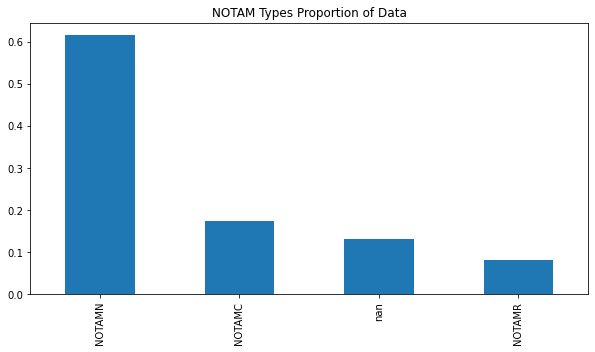

In [74]:
df['NOTAM_TYPE'].value_counts(dropna=False, normalize=True).plot(kind='bar', 
                                                                 title='NOTAM Types Proportion of Data',
                                                                 figsize=(10, 5));

#### RELATED_NOTAM_ID
* Majority are NaNs, at 77% of the data.
* No other entry has a material proportion of the data.
* Repeats

In [19]:
df['RELATED_NOTAM_ID']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1062033    NaN
1062034    NaN
1062035    NaN
1062036    NaN
1062037    NaN
Name: RELATED_NOTAM_ID, Length: 1062038, dtype: object

In [20]:
df['RELATED_NOTAM_ID'].value_counts(dropna=False)

NaN         819718
A0001/17        94
A0001/18        91
A0001/19        70
B0001/18        49
             ...  
J2533/18         1
L4626/16         1
J1665/18         1
J1687/18         1
A3935/20         1
Name: RELATED_NOTAM_ID, Length: 130206, dtype: int64

In [55]:
df['RELATED_NOTAM_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN         0.77183
A0001/17    0.00009
A0001/18    0.00009
A0001/19    0.00007
B0001/18    0.00005
             ...   
J2533/18    0.00000
L4626/16    0.00000
J1665/18    0.00000
J1687/18    0.00000
A3935/20    0.00000
Name: RELATED_NOTAM_ID, Length: 130206, dtype: object

#### SIMPLE_TEXT
* Close to majority are NaNs, covering 49% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [21]:
df['SIMPLE_TEXT']

0          !SUAC 05/604 ZAU AIRSPACE VOLK SOUTH MOA ACT 5...
1          !SUAC 05/603 ZAU AIRSPACE VOLK EAST MOA ACT 80...
2          !SUAC 05/605 ZMP AIRSPACE FALLS 1 MOA ACT 500F...
3          !SUAC 05/607 ZMP AIRSPACE FALLS 2 MOA ACT 500F...
4          !SUAC 05/602 ZMP AIRSPACE VOLK WEST MOA ACT 10...
                                 ...                        
1062033    !MCN 05/635 JYL OBST TOWER LGT (ASR 1310313) 3...
1062034    !JBR 05/385 CXW AD AP SELF SERVE FUEL NOT AVBL...
1062035    !BLM 05/018 BLM AIRSPACE SEE MIV 05/137 UAS 20...
1062036    !MIV 05/137 COL AIRSPACE UAS WI AN AREA DEFINE...
1062037                                                  NaN
Name: SIMPLE_TEXT, Length: 1062038, dtype: object

In [22]:
df['SIMPLE_TEXT'].value_counts(dropna=False)

NaN                                                                                                                                         517886
!YXX 06/018 RF2  CRF2 OBST LGT U/S TOWER 490011N 1223152W (APRX 6 NM E AD) 150 FT AGL 330 MSL  1706130730-1706131500EST                         14
M0011/18 NOTAMC M0010/18                                                                                                                        11
M0017/18 NOTAMC M0016/18                                                                                                                        11
L0002/18 NOTAMC L0001/18                                                                                                                        11
                                                                                                                                             ...  
!FDC 7/3056 FDC CANCEL 7/2937 YIP                                                                                     

In [54]:
df['SIMPLE_TEXT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                                                                                         0.48763
!YXX 06/018 RF2  CRF2 OBST LGT U/S TOWER 490011N 1223152W (APRX 6 NM E AD) 150 FT AGL 330 MSL  1706130730-1706131500EST                     0.00001
M0011/18 NOTAMC M0010/18                                                                                                                    0.00001
M0017/18 NOTAMC M0016/18                                                                                                                    0.00001
L0002/18 NOTAMC L0001/18                                                                                                                    0.00001
                                                                                                                                             ...   
!FDC 7/3056 FDC CANCEL 7/2937 YIP                                                                               

#### LOC_ID_ACCOUNTABLE_ORG
* Majority are NaNs, at 51% of the data.
* FDC represents 10% of data, and a few others represent >1% of data.
* Repeats
* Includes chart

In [23]:
df['LOC_ID_ACCOUNTABLE_ORG']

0          SUAC
1          SUAC
2          SUAC
3          SUAC
4          SUAC
           ... 
1062033     MCN
1062034     JBR
1062035     BLM
1062036     MIV
1062037     NaN
Name: LOC_ID_ACCOUNTABLE_ORG, Length: 1062038, dtype: object

In [24]:
df['LOC_ID_ACCOUNTABLE_ORG'].value_counts(dropna=False)

NaN     543538
FDC     109679
SUAW     39548
SUAC     26722
SUAE     19503
         ...  
OEHL         1
EPMM         1
PAIM         1
XPY          1
NUW          1
Name: LOC_ID_ACCOUNTABLE_ORG, Length: 2226, dtype: int64

In [53]:
df['LOC_ID_ACCOUNTABLE_ORG'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN     0.51179
FDC     0.10327
SUAW    0.03724
SUAC    0.02516
SUAE    0.01836
         ...   
OEHL    0.00000
EPMM    0.00000
PAIM    0.00000
XPY     0.00000
NUW     0.00000
Name: LOC_ID_ACCOUNTABLE_ORG, Length: 2226, dtype: object

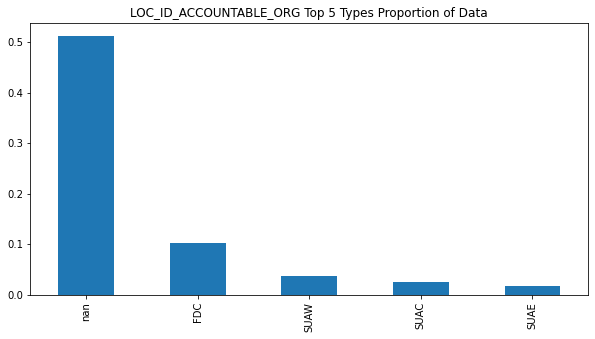

In [77]:
df['LOC_ID_ACCOUNTABLE_ORG'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                         title='LOC_ID_ACCOUNTABLE_ORG Top 5 Types Proportion of Data',
                                                                                         figsize=(10, 5));

#### NOTAM_NUMBER
* Majority are NaNs, at 51% of the data.
* No other entry has a material proportion of the data.
* Lots of repeats > what does this mean?

In [25]:
df['NOTAM_NUMBER']

0          05/604
1          05/603
2          05/605
3          05/607
4          05/602
            ...  
1062033    05/635
1062034    05/385
1062035    05/018
1062036    05/137
1062037       NaN
Name: NOTAM_NUMBER, Length: 1062038, dtype: object

In [26]:
df['NOTAM_NUMBER'].value_counts(dropna=False)

NaN       545478
10/001      1292
05/001      1280
03/001      1219
12/001      1133
           ...  
9/9303         1
6/1658         1
9/9036         1
6/1659         1
0/4686         1
Name: NOTAM_NUMBER, Length: 49843, dtype: int64

In [52]:
df['NOTAM_NUMBER'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN       0.51361
10/001    0.00122
05/001    0.00121
03/001    0.00115
12/001    0.00107
           ...   
9/9303    0.00000
6/1658    0.00000
9/9036    0.00000
6/1659    0.00000
0/4686    0.00000
Name: NOTAM_NUMBER, Length: 49843, dtype: object

#### RELATED_NOTAM_NUMBER
* Majority are NaNs, covering over 91% of the data.
* No other entry has a material proportion of the data.
* What does this field mean?

In [27]:
df['RELATED_NOTAM_NUMBER']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
1062033       NaN
1062034       NaN
1062035    05/137
1062036       NaN
1062037       NaN
Name: RELATED_NOTAM_NUMBER, Length: 1062038, dtype: object

In [28]:
df['RELATED_NOTAM_NUMBER'].value_counts(dropna=False)

NaN       969225
8/3465        87
7/3678        87
7/1888        85
7/1870        84
           ...  
8/4081         1
8/4079         1
8/4076         1
8/0108         1
05/774         1
Name: RELATED_NOTAM_NUMBER, Length: 36592, dtype: int64

In [51]:
df['RELATED_NOTAM_NUMBER'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN       0.91261
8/3465    0.00008
7/3678    0.00008
7/1888    0.00008
7/1870    0.00008
           ...   
8/4081    0.00000
8/4079    0.00000
8/4076    0.00000
8/0108    0.00000
05/774    0.00000
Name: RELATED_NOTAM_NUMBER, Length: 36592, dtype: object

#### TEXT
* There are NaNs, and its the biggest cateogry, but only covers 0.006% of data.
* Repeats

In [29]:
df['TEXT']

0          AIRSPACE VOLK SOUTH MOA ACT 500FT UP TO BUT NO...
1          AIRSPACE VOLK EAST MOA ACT 8000FT UP TO BUT NO...
2          AIRSPACE FALLS 1 MOA ACT 500FT UP TO BUT NOT I...
3          AIRSPACE FALLS 2 MOA ACT 500FT UP TO BUT NOT I...
4          AIRSPACE VOLK WEST MOA ACT 100FT UP TO BUT NOT...
                                 ...                        
1062033    OBST TOWER LGT (ASR 1310313) 324053.20N0813415...
1062034                       AD AP SELF SERVE FUEL NOT AVBL
1062035                          AIRSPACE SEE MIV 05/137 UAS
1062036    AIRSPACE UAS WI AN AREA DEFINED AS 1NM RADIUS ...
1062037                                       RWY 22 ILS U/S
Name: TEXT, Length: 1062038, dtype: object

In [30]:
df['TEXT'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                 6042
NAV VORTAC NOT MNT                                                                                                                                                                                                  4268
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES.                              4055
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES                               3978
NAV VOR/DME NOT MNT                                                                                                                 

In [50]:
df['TEXT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                                                                                                                                                                 0.00569
NAV VORTAC NOT MNT                                                                                                                                                                                                  0.00402
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES.                              0.00382
GPS RAIM PREDICTION FOR: TSO-C129 FAULT DETECTION NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION ONLY NO GPS RAIM OUTAGES TSO-C146A FAULT DETECTION WITH EXCLUSION NO GPS RAIM OUTAGES                               0.00375
NAV VOR/DME NOT MNT                                                                                                     

#### Q_CODE
* Close to majority are NaNs, covering 39% of the data.
* A few other categories represent >1% of data.
* Lots of repeats
* Includes chart

In [31]:
df['Q_CODE']

0                                           NaN
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                           ...                 
1062033                                     NaN
1062034                                     NaN
1062035                                     NaN
1062036                                     NaN
1062037    KZNY/QXXXX////000/999/4047N07352W005
Name: Q_CODE, Length: 1062038, dtype: object

In [32]:
df['Q_CODE'].value_counts(dropna=False)

NaN                                            416162
/QRRCA/                                         31445
/QXXXX/                                         15359
LRBB/QRRCA/IV/BO                                 7677
YUXX/QARCA/I/NBO/E/000/999/2537S13421E999        6389
                                                ...  
UUWV/QRTCA/IV/BO/W/000/999/5511N03528E001           1
UWWW/QRTCA/IV/BO/W/010/030/5502N05216E011           1
UMKK/QRTCA/IV/BO/W/000/999/5426N02013E004           1
LFMM/QACAH/IV/NBO/AE/000/050/4234N00848E008         1
CZYZ/QMRAR/IV/NBO/A/000/999/4552N07715W005          1
Name: Q_CODE, Length: 88562, dtype: int64

In [49]:
df['Q_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                            0.39185
/QRRCA/                                        0.02961
/QXXXX/                                        0.01446
LRBB/QRRCA/IV/BO                               0.00723
YUXX/QARCA/I/NBO/E/000/999/2537S13421E999      0.00602
                                                ...   
UUWV/QRTCA/IV/BO/W/000/999/5511N03528E001      0.00000
UWWW/QRTCA/IV/BO/W/010/030/5502N05216E011      0.00000
UMKK/QRTCA/IV/BO/W/000/999/5426N02013E004      0.00000
LFMM/QACAH/IV/NBO/AE/000/050/4234N00848E008    0.00000
CZYZ/QMRAR/IV/NBO/A/000/999/4552N07715W005     0.00000
Name: Q_CODE, Length: 88562, dtype: object

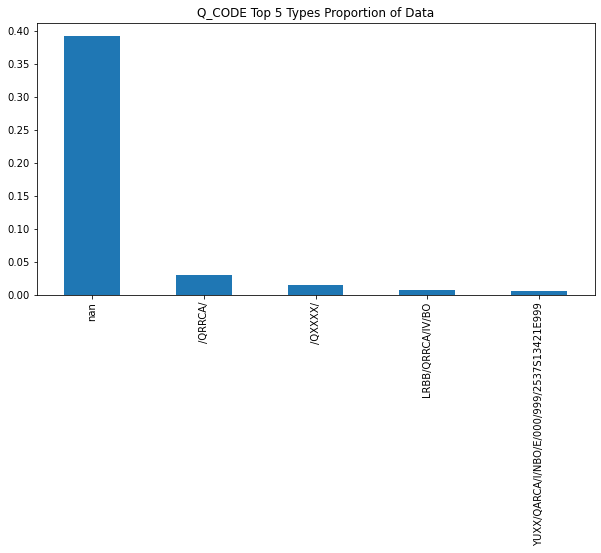

In [79]:
df['Q_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='Q_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### Q_CODE_INTERPRETATION
* Majority are NaNs, covering 56% of the data.
* A few other categories represent >1% of data.
* Lots of repeats
* Includes chart
* Counts do not match Q_CODE > what could this mean?

In [33]:
df['Q_CODE_INTERPRETATION']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1062033    NaN
1062034    NaN
1062035    NaN
1062036    NaN
1062037    NaN
Name: Q_CODE_INTERPRETATION, Length: 1062038, dtype: object

In [34]:
df['Q_CODE_INTERPRETATION'].value_counts(dropna=False)

NaN                                                   597509
RESTRICTED AREA ACTIVATED                              82311
TEMPORARY RESTRICTED AREA ACTIVATED                    41880
AERODROME                                              35304
DANGER AREA ACTIVATED                                  22638
                                                       ...  
AIRCRAFT STANDS REALIGNED                                  1
LOCALIZER ILS HAZARD                                       1
LOCALIZER HAZARD                                           1
RUNWAY AIRCRAFT RESTRICTED TO RUNWAYS AND TAXIWAYS         1
FUEL AVAILABILITY ACTIVATED                                1
Name: Q_CODE_INTERPRETATION, Length: 1425, dtype: int64

In [48]:
df['Q_CODE_INTERPRETATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                   0.56261
RESTRICTED AREA ACTIVATED                             0.07750
TEMPORARY RESTRICTED AREA ACTIVATED                   0.03943
AERODROME                                             0.03324
DANGER AREA ACTIVATED                                 0.02132
                                                       ...   
AIRCRAFT STANDS REALIGNED                             0.00000
LOCALIZER ILS HAZARD                                  0.00000
LOCALIZER HAZARD                                      0.00000
RUNWAY AIRCRAFT RESTRICTED TO RUNWAYS AND TAXIWAYS    0.00000
FUEL AVAILABILITY ACTIVATED                           0.00000
Name: Q_CODE_INTERPRETATION, Length: 1425, dtype: object

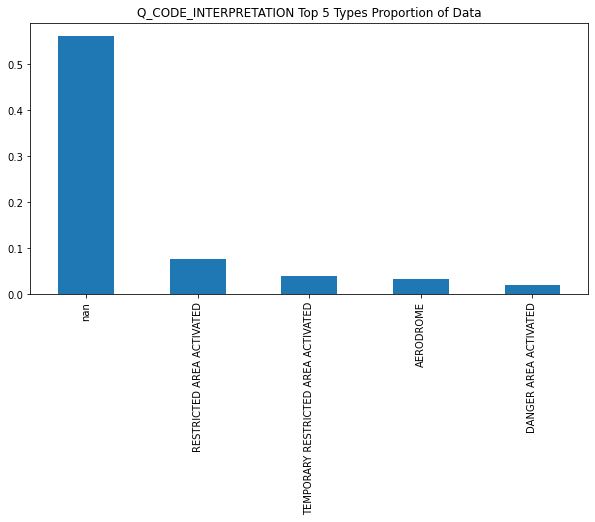

In [80]:
df['Q_CODE_INTERPRETATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                                        title='Q_CODE_INTERPRETATION Top 5 Types Proportion of Data',
                                                                                        figsize=(10, 5));

#### A_CODE
* Majority are NaNs, covering 56% of the data.
* A few other categories represent >1% of data.
* Lots of repeats
* Includes chart

In [35]:
df['A_CODE']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1062033     NaN
1062034     NaN
1062035     NaN
1062036     NaN
1062037    KLGA
Name: A_CODE, Length: 1062038, dtype: object

In [36]:
df['A_CODE'].value_counts(dropna=False)

NaN          321967
UUWV          18316
LRBB          18152
YMMM/YBBB     11050
EGTT           9778
              ...  
FQVL              1
FQMP              1
LFBX              1
EHTL              1
1422FT            1
Name: A_CODE, Length: 11800, dtype: int64

In [47]:
df['A_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN          0.30316
UUWV         0.01725
LRBB         0.01709
YMMM/YBBB    0.01040
EGTT         0.00921
              ...   
FQVL         0.00000
FQMP         0.00000
LFBX         0.00000
EHTL         0.00000
1422FT       0.00000
Name: A_CODE, Length: 11800, dtype: object

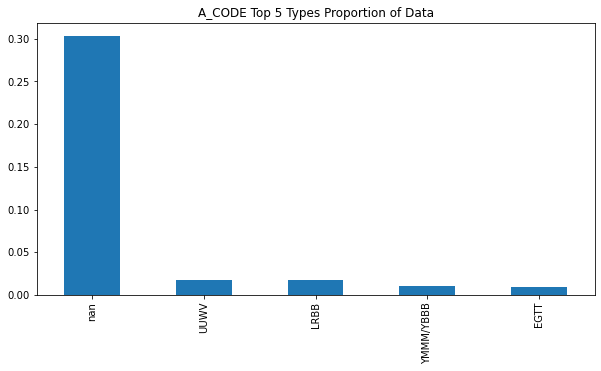

In [81]:
df['A_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='A_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### B_CODE
* Close to majority are NaNs, covering 41% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [37]:
df['B_CODE']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
1062033                        NaN
1062034                        NaN
1062035                        NaN
1062036                        NaN
1062037    2020-05-30 21:48:00.000
Name: B_CODE, Length: 1062038, dtype: object

In [38]:
df['B_CODE'].value_counts(dropna=False)

NaN                        432084
2019-10-10 09:01:00.000       365
2018-09-19 04:00:00.000       304
2019-12-05 00:00:00.000       257
2019-05-23 00:00:00.000       249
                            ...  
2016-09-01 00:45:00.000         1
2017-12-16 17:26:00.000         1
2018-01-13 13:34:00.000         1
2018-01-12 15:19:00.000         1
2020-05-30 21:49:00.000         1
Name: B_CODE, Length: 241079, dtype: int64

In [46]:
df['B_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                        0.40684
2019-10-10 09:01:00.000    0.00034
2018-09-19 04:00:00.000    0.00029
2019-12-05 00:00:00.000    0.00024
2019-05-23 00:00:00.000    0.00023
                            ...   
2016-09-01 00:45:00.000    0.00000
2017-12-16 17:26:00.000    0.00000
2018-01-13 13:34:00.000    0.00000
2018-01-12 15:19:00.000    0.00000
2020-05-30 21:49:00.000    0.00000
Name: B_CODE, Length: 241079, dtype: object

#### C_CODE
* Close to majority are NaNs, covering 49% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [82]:
df['C_CODE']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
1062033                        NaN
1062034                        NaN
1062035                        NaN
1062036                        NaN
1062037    2020-05-31 01:00:00.000
Name: C_CODE, Length: 1062038, dtype: object

In [83]:
df['C_CODE'].value_counts(dropna=False)

NaN                        525191
2018-01-31 23:59:00.000       480
2017-02-28 23:59:00.000       393
2019-02-28 23:59:00.000       362
2018-02-28 23:59:00.000       354
                            ...  
2018-04-15 23:49:00.000         1
2018-08-17 20:17:00.000         1
2018-05-02 19:02:00.000         1
2018-05-22 18:17:00.000         1
2020-05-31 22:30:00.000         1
Name: C_CODE, Length: 93943, dtype: int64

In [86]:
df['C_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                        0.49451
2018-01-31 23:59:00.000    0.00045
2017-02-28 23:59:00.000    0.00037
2019-02-28 23:59:00.000    0.00034
2018-02-28 23:59:00.000    0.00033
                            ...   
2018-04-15 23:49:00.000    0.00000
2018-08-17 20:17:00.000    0.00000
2018-05-02 19:02:00.000    0.00000
2018-05-22 18:17:00.000    0.00000
2020-05-31 22:30:00.000    0.00000
Name: C_CODE, Length: 93943, dtype: object

#### D_CODE
* Majority are NaNs, covering 90% of the data. 
* No other entry has a material proportion of the data.
* A few repeats

In [87]:
df['D_CODE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1062033    NaN
1062034    NaN
1062035    NaN
1062036    NaN
1062037    NaN
Name: D_CODE, Length: 1062038, dtype: object

In [88]:
df['D_CODE'].value_counts(dropna=False)

NaN                                                                             954182
DAILY 0600-1800                                                                    872
H24                                                                                835
DAILY 0500-1700                                                                    746
SR-SS                                                                              729
                                                                                 ...  
05 1100-2100, 06-08 0700-2100, 09 0700-1100                                          1
1315.9FT (255.9FT AGL) OUT OF SERVICE 1612261427-1701261427                          1
5214.6FT (234.9FT AGL) OUT OF SERVICE 1803051042-1804041200                          1
04 2300-2359, 05 06 0000-0300 0500-1000 2300-2359, 07 0000-   0300 0500-1000         1
1807252300 TO 1807261200    1807262300 TO 1807270300                                 1
Name: D_CODE, Length: 45932, dtype: int64

In [89]:
df['D_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN                                                                             0.89844
DAILY 0600-1800                                                                 0.00082
H24                                                                             0.00079
DAILY 0500-1700                                                                 0.00070
SR-SS                                                                           0.00069
                                                                                 ...   
05 1100-2100, 06-08 0700-2100, 09 0700-1100                                     0.00000
1315.9FT (255.9FT AGL) OUT OF SERVICE 1612261427-1701261427                     0.00000
5214.6FT (234.9FT AGL) OUT OF SERVICE 1803051042-1804041200                     0.00000
04 2300-2359, 05 06 0000-0300 0500-1000 2300-2359, 07 0000-   0300 0500-1000    0.00000
1807252300 TO 1807261200    1807262300 TO 1807270300                            0.00000
Name: D_CODE, Length: 45932, dty

#### E_CODE
* No entry has a material proportion of the data.
* A few repeats

In [90]:
df['E_CODE']

0          AIRSPACE VOLK SOUTH MOA ACT 500FT UP TO BUT NO...
1          AIRSPACE VOLK EAST MOA ACT 8000FT UP TO BUT NO...
2          AIRSPACE FALLS 1 MOA ACT 500FT UP TO BUT NOT I...
3          AIRSPACE FALLS 2 MOA ACT 500FT UP TO BUT NOT I...
4          AIRSPACE VOLK WEST MOA ACT 100FT UP TO BUT NOT...
                                 ...                        
1062033    OBST TOWER LGT (ASR 1310313) 324053.20N0813415...
1062034                       AD AP SELF SERVE FUEL NOT AVBL
1062035                          AIRSPACE SEE MIV 05/137 UAS
1062036    AIRSPACE UAS WI AN AREA DEFINED AS 1NM RADIUS ...
1062037                                      RWY 22 ILS U/S 
Name: E_CODE, Length: 1062038, dtype: object

In [91]:
df['E_CODE'].value_counts(dropna=False)

CNL.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  8238
CNL. NEW NOTAM TO FLW.                                                       

In [92]:
df['E_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

CNL.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0.00776
CNL. NEW NOTAM TO FLW.                                                    

#### F_CODE
* Close to a majority are NaNs or 000, covering 39% and 39% of the data, repectively. 
* A few other categories represent >1% of data.
* A few repeats
* Includes chart

In [93]:
df['F_CODE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1062033    NaN
1062034    NaN
1062035    NaN
1062036    NaN
1062037    000
Name: F_CODE, Length: 1062038, dtype: object

In [94]:
df['F_CODE'].value_counts(dropna=False)

NaN         412559
000         405623
SFC         103570
GND          53302
SEE           2396
             ...  
4/47/47          1
135.5            1
690.0FT          1
4/48/48          1
2182.1FT         1
Name: F_CODE, Length: 2068, dtype: int64

In [95]:
df['F_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN         0.38846
000         0.38193
SFC         0.09752
GND         0.05019
SEE         0.00226
             ...   
4/47/47     0.00000
135.5       0.00000
690.0FT     0.00000
4/48/48     0.00000
2182.1FT    0.00000
Name: F_CODE, Length: 2068, dtype: object

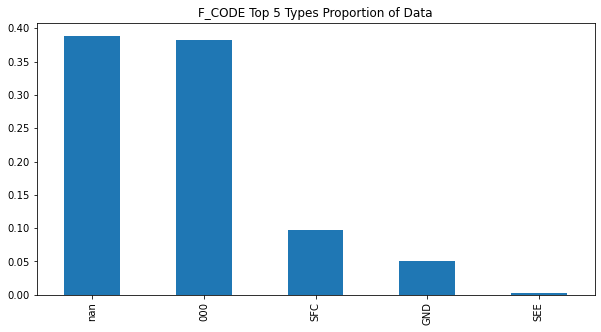

In [107]:
df['F_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='F_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### G_CODE
* Close to a majority are NaNs or 999, covering 39% and 35% of the data, repectively. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [97]:
df['G_CODE']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1062033    NaN
1062034    NaN
1062035    NaN
1062036    NaN
1062037    999
Name: G_CODE, Length: 1062038, dtype: object

In [98]:
df['G_CODE'].value_counts(dropna=False)

NaN        412500
999        371563
UNL          9253
5000FT       6222
FL230        5040
            ...  
254.6FT         1
360.9FT         1
283.1FT         1
269.0FT         1
1626FT          1
Name: G_CODE, Length: 4693, dtype: int64

In [99]:
df['G_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

NaN        0.38840
999        0.34986
UNL        0.00871
5000FT     0.00586
FL230      0.00475
            ...   
254.6FT    0.00000
360.9FT    0.00000
283.1FT    0.00000
269.0FT    0.00000
1626FT     0.00000
Name: G_CODE, Length: 4693, dtype: object

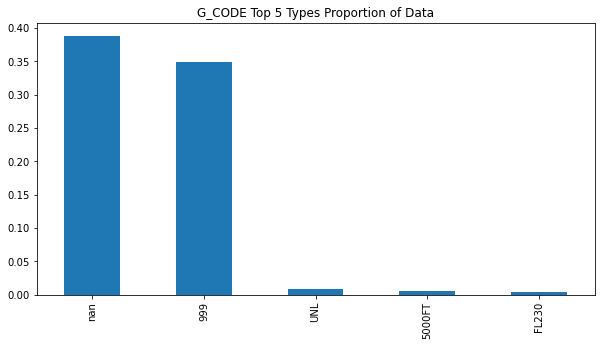

In [106]:
df['G_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='G_CODE Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### CLASSIFICATION
* Close to a majority are INTL or DOM, covering 40% and 38% of the data, repectively. 
* Next two biggest categories, MIL and FDC, both cover more than 10% of the data each. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [101]:
df['CLASSIFICATION']

0           DOM
1           DOM
2           DOM
3           DOM
4           DOM
           ... 
1062033     DOM
1062034     DOM
1062035     DOM
1062036     DOM
1062037    INTL
Name: CLASSIFICATION, Length: 1062038, dtype: object

In [102]:
df['CLASSIFICATION'].value_counts(dropna=False)

INTL               427893
DOM                406881
MIL                116128
FDC                109681
LMIL                 1219
                    ...  
M0044/18 NOTAMN         1
M0042/18 NOTAMN         1
M0043/18 NOTAMN         1
M0159/18 NOTAMN         1
M0101/20 NOTAMN         1
Name: CLASSIFICATION, Length: 69, dtype: int64

In [103]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

INTL               0.40290
DOM                0.38311
MIL                0.10934
FDC                0.10327
LMIL               0.00115
                    ...   
M0044/18 NOTAMN    0.00000
M0042/18 NOTAMN    0.00000
M0043/18 NOTAMN    0.00000
M0159/18 NOTAMN    0.00000
M0101/20 NOTAMN    0.00000
Name: CLASSIFICATION, Length: 69, dtype: object

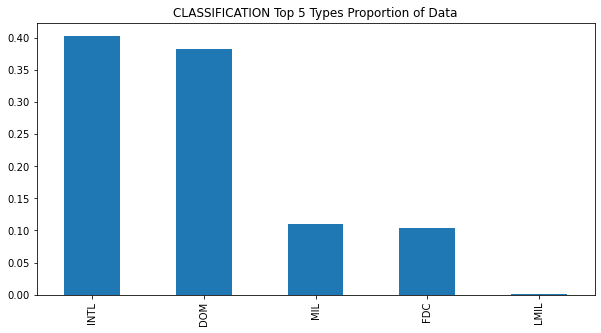

In [105]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='CLASSIFICATION Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### CLASSIFICATION
* Close to a majority are INTL or DOM, covering 40% and 38% of the data, repectively. 
* Next two biggest categories, MIL and FDC, both cover more than 10% of the data each. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [101]:
df['CLASSIFICATION']

0           DOM
1           DOM
2           DOM
3           DOM
4           DOM
           ... 
1062033     DOM
1062034     DOM
1062035     DOM
1062036     DOM
1062037    INTL
Name: CLASSIFICATION, Length: 1062038, dtype: object

In [102]:
df['CLASSIFICATION'].value_counts(dropna=False)

INTL               427893
DOM                406881
MIL                116128
FDC                109681
LMIL                 1219
                    ...  
M0044/18 NOTAMN         1
M0042/18 NOTAMN         1
M0043/18 NOTAMN         1
M0159/18 NOTAMN         1
M0101/20 NOTAMN         1
Name: CLASSIFICATION, Length: 69, dtype: int64

In [103]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

INTL               0.40290
DOM                0.38311
MIL                0.10934
FDC                0.10327
LMIL               0.00115
                    ...   
M0044/18 NOTAMN    0.00000
M0042/18 NOTAMN    0.00000
M0043/18 NOTAMN    0.00000
M0159/18 NOTAMN    0.00000
M0101/20 NOTAMN    0.00000
Name: CLASSIFICATION, Length: 69, dtype: object

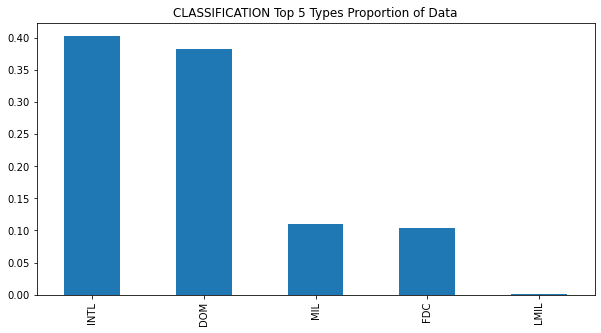

In [105]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='CLASSIFICATION Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));

#### POSSIBLE_NOTAM_ID
* How does this relate to NOTAM_ID? Proportions do not match. 
* Repeats, but cover an tiny proportion of the data.

In [108]:
df['POSSIBLE_NOTAM_ID']

0                  0604/16
1                  0603/16
2                  0605/16
3                  0607/16
4                  0602/16
                ...       
1062033     0635/20 NOTAMN
1062034     0385/20 NOTAMN
1062035            0018/20
1062036            0137/20
1062037    A1093/20 NOTAMN
Name: POSSIBLE_NOTAM_ID, Length: 1062038, dtype: object

In [109]:
df['POSSIBLE_NOTAM_ID'].value_counts(dropna=False)

0001/17 NOTAMN     3666
0002/17 NOTAMN     2954
0003/17 NOTAMN     2639
0004/17 NOTAMN     2405
0001/18 NOTAMN     2377
                   ... 
B1053/17 NOTAMN       1
1091/17               1
H6844/17 NOTAMC       1
5474/17 NOTAMC        1
B0833/20 NOTAMN       1
Name: POSSIBLE_NOTAM_ID, Length: 367394, dtype: int64

In [110]:
df['POSSIBLE_NOTAM_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0001/17 NOTAMN     0.00345
0002/17 NOTAMN     0.00278
0003/17 NOTAMN     0.00248
0004/17 NOTAMN     0.00226
0001/18 NOTAMN     0.00224
                    ...   
B1053/17 NOTAMN    0.00000
1091/17            0.00000
H6844/17 NOTAMC    0.00000
5474/17 NOTAMC     0.00000
B0833/20 NOTAMN    0.00000
Name: POSSIBLE_NOTAM_ID, Length: 367394, dtype: object

#### MIN_ALT
* 0 as a string and 0 as numeric both included. 
    * need to parse manually...
    * Convert to float to aggregate better. __Assuming both all are numeric.__
* 
* Top three categories (
* Next two biggest categories, MIL and FDC, both cover more than 10% of the data each. 
* No other entry has a material proportion of the data.
* A few repeats
* Includes chart

In [144]:
# Helper function
def convert_to_float(row):
    try:
        return float(row)
    except:
        return row

In [145]:
df['MIN_ALT'].apply(convert_to_float)

0           5.0
1          80.0
2           5.0
3           5.0
4           1.0
           ... 
1062033     NaN
1062034     NaN
1062035     NaN
1062036     0.0
1062037     0.0
Name: MIN_ALT, Length: 1062038, dtype: object

In [129]:
df['MIN_ALT'][df['MIN_ALT']=='0'] = 0.0

/var/folders/wk/_x7mg1g17x70jm9czv01yk_r0000gp/T/ipykernel_86593/767993983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MIN_ALT'][df['MIN_ALT']=='0'] = 0.0


In [130]:
df['MIN_ALT'] = pd.to_numeric(df['MIN_ALT'], errors='ignore', downcast='float')

In [148]:
df['MIN_ALT']

0           5.0
1          80.0
2           5.0
3           5.0
4           1.0
           ... 
1062033     NaN
1062034     NaN
1062035     NaN
1062036     0.0
1062037     0.0
Name: MIN_ALT, Length: 1062038, dtype: object

In [147]:
df['MIN_ALT'].value_counts(dropna=False)

0         364696
NaN       305060
0.0       264381
110         5676
5           3970
           ...  
3.484          1
2.116          1
0.55           1
8.947          1
21.821         1
Name: MIN_ALT, Length: 1834, dtype: int64

In [135]:
df['MIN_ALT'][df['MIN_ALT']=='5']

82001      5
82604      5
83118      5
83122      5
83123      5
          ..
1031778    5
1031780    5
1032095    5
1032096    5
1032097    5
Name: MIN_ALT, Length: 3970, dtype: object

In [136]:
df['MIN_ALT'][df['MIN_ALT']=='5']

82001      5
82604      5
83118      5
83122      5
83123      5
          ..
1031778    5
1031780    5
1032095    5
1032096    5
1032097    5
Name: MIN_ALT, Length: 3970, dtype: object

In [143]:
df['MIN_ALT'].apply(lambda x: try float(x) except x)

SyntaxError: invalid syntax (2103517684.py, line 1)

In [142]:
type(df['MIN_ALT'].iloc[82001])

str

In [146]:
df['MIN_ALT'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0         0.34339
NaN       0.28724
0.0       0.24894
110       0.00534
5         0.00374
           ...   
3.484     0.00000
2.116     0.00000
0.55      0.00000
8.947     0.00000
21.821    0.00000
Name: MIN_ALT, Length: 1834, dtype: object

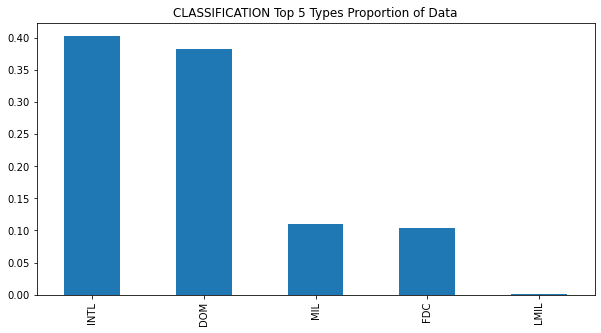

In [105]:
df['CLASSIFICATION'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar', 
                                                                         title='CLASSIFICATION Top 5 Types Proportion of Data',
                                                                         figsize=(10, 5));